
# Project: Exploratory Data Analysis of U.S. Medical Insurance Costs

# Introduction


## Project Description

For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.

However, you're now tasked with working with the actual information in the dataset and performing your own independent analysis on real-world data! We will not be providing step-by-step instructions on what to do, but we will provide you with a framework to structure your exploration and analysis. For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.




## Project Objectives

- Work locally on your own computer
- Import a dataset into your program
- Analyze a dataset by building out functions or class methods
- Use libraries to assist in your analysis
- Optional: Document and organize your findings
- Optional: Make predictions about a dataset’s features based on your findings


## Personal Notes


### Challenges
- This is intended to be a "growing" project. While it won't be updated regularly post-completion, any critical improvements or updates deemed necessary will be implemented during the project phase.
- This is my first experience working with Git branches, which presents a learning curve for managing different versions of the project effectively.


### Learning goals
- Enhance my skills in exploratory data analysis, focusing on the variables and objectives specified by the project description.
- Learn the basics of Git branching to manage different stages and updates of this project effectively. This aligns with the challenge of using Git repositories for the first time and will be an invaluable skill for future projects. This will mostly be done using GitHub.



## Project Setup

This first code cell will be used to import the necessary libraries and load the dataset into a dataframe.

In [69]:
# WARNING: This cell *needs* to be run *first* for the rest of the notebook to work.
import pandas as pd
import matplotlib.pyplot as plt
import scipy

# Define the paths to the data files
data_path = '../data'
raw_data_path = data_path + '/raw'
processed_data_path = data_path + '/processed'

# Define the path to the source file
source_file_path = raw_data_path + '/raw.csv'

# Error handling for the source file
try:
    # Load the source file into a dataframe
    main_df = pd.read_csv(source_file_path)
except FileNotFoundError:
    print('The source file was not found')
else:
    print(main_df.head())
    
    # Library versions
    print(f'Versions:')
    print(f'Pandas version: {pd.__version__}')
    print(f'Matplotlib version: {plt.matplotlib.__version__}')  
    print(f'Scipi version: {scipy.__version__}')

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Versions:
Pandas version: 2.0.3
Matplotlib version: 3.7.2
Scipi version: 1.11.2



# Initial Data Exploration


## Quick Data Overview

Before diving into an analysis of the data, it's important to get an initial feel for the data. This gives an idea of what the data looks like.

In [70]:
# Display the head of the dataframe
print(main_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [71]:
# Display the tail of the dataframe
print(main_df.tail())

      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


At a first glance, the dataset seems to be fairly clean. There are no obvious issues and the values are all within a reasonable range.


## Data Dimensions

Knowing the shape of the dataset helps to understand the size. This is important for understanding the usage of computational resources.

In [72]:
# Display the shape of the dataframe
print(main_df.shape)

(1338, 7)


The database consists of 1338 rows and seven columns. This is a fairly small dataset, which should be easy to work with.


## Handling Null Values

Null values can cause data analysis and models to misbehave. It's important to know if there are any null values in the dataset and how to handle them.

In [73]:
# Check for null values in the dataframe
print(main_df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no null values in the dataset. This is good news, as it means that there is no need to handle null values.


## Removing Duplicate Values

Duplicate entries mess with the data, as they skew the results. It's important to know if there are any duplicate values in the dataset and how to handle them.

In [74]:
# Check for duplicate values in the dataframe
print(main_df.duplicated().sum())

1


It looks like there is a single duplicate value in the dataset. Before removing it, it may be useful to see what the duplicate value is.

In [75]:
# Display the duplicate value
print(main_df[main_df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


This duplicate could be useful information. Since there are no names or IDs in the dataset, the only clue present to show that this is a duplicate is the charges value. This value is too specific to be a coincidence. For this reason, the duplicate value will be removed and only the first instance will be kept.

In [76]:
# Remove the duplicate value
main_df.drop_duplicates(inplace=True)


## Data Dimensions After Cleaning

After cleaning the dataset, it's important to check the dimensions again. This will help determine if the cleaning process was successful. In this instance, the number of rows should be reduced by one.

In [77]:
# Display the shape of the dataframe
print(main_df.shape)

(1337, 7)


The number of rows has been reduced by one, which means that the duplicate value was successfully removed.


## Saving the Cleaned Data

Before proceeding with any analysis, it's important to save the cleaned data into a new `.csv` file. This could help other people to use the data that's being analyzed.

In [78]:
# Define the path to the destination file
destination_file_path = processed_data_path + '/processed.csv'

# Save the dataframe into a new csv file (overwriting the old one)
main_df.to_csv(destination_file_path, index=False)


# Exploratory Data Analysis

The Exploratory Data Analysis (EDA) is the main part of this project. This section aims to deep dive into the data and extract useful information, presenting a comprehensive understanding of its structure, relationships, and patterns. The EDA will be broken down into the following sections:

- Data types: The types of data present in the dataset.
- Univariate Analysis: The analysis of a single variable.
- Bivariate Analysis: The analysis and relationship between two variables. Also measures the strength of the relationship.
- Conclusions: The conclusions of the EDA.

Finally, the section concludes with a summary that goes of the key findings of the EDA. There won't be any machine learning models, nor other multivariate analysis, since this would be out of the simple scope of this project.


## Data Types

This short section will be used to review the data types which are present in the dataset. This is important since it can determine how each variable should be analyzed.

In [79]:
# Display the data types of the dataframe
print(main_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


The data types shows that there are four numerical variables and three categorical variables:

Numerical variables: `age`, `bmi`, `children`, `charges`.
- The numerical variables will be analyzed using descriptive statistics and histograms. Box plots will also be used to determine if there are any outliers in the data if the descriptive statistics and histograms show that there is a high variability in the data.

In [80]:
# Select the numerical variables for future use
numerical_fields = main_df.select_dtypes(include='number').columns

Categorical variables: `sex`, `smoker`, `region`.
- The categorical variables will be analyzed using bar charts. Additionally, if the categorical variables are ordinal, then they will be analyzed using descriptive statistics.

In [81]:
# Select the categorical variables for future use
categorical_fields = main_df.select_dtypes(include='object').columns


## Univariate Analysis

This section consists of a univariate analysis for each variable in the dataset. The analysis will be done using the `describe()` method and a series of histograms. The main focus of this histogram is to find patterns in the data.


### Descriptive Statistics

It's important to review the standard descriptive statistics. This gives a good idea for the distribution of the data. This only applies to the numerical variables, as the categorical variables don't have a mean or standard deviation.

In [82]:
# Obtain the descriptive statistics for the dataframe
description = main_df.describe()

# Display the descriptive statistics
print(description)

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


For the categorical variables, each one of them needs to be reviewed individually. Firstly, finding out if they are ordinal will determine if the descriptive statistics can be used.

In [83]:
# Loop through the categorical variables and find the unique values
for variable in categorical_fields:
    print(f'Variable "{variable}": {len(main_df[variable].unique())} unique values.')

Variable "sex": 2 unique values.
Variable "smoker": 2 unique values.
Variable "region": 4 unique values.


The categorical variables are all ordinal, which means the descriptive statistics can be used. First, finding the mode will help to determine the most common value.

In [84]:
# For each variable show, the total amount of times each value appears, percentage and determine the mode
for variable in categorical_fields:
    # Variable name
    print(f'Variable "{variable}":')
    
    # For each value, show the quantity and percentage
    for value in main_df[variable].unique():
        quantity = main_df[variable].value_counts()[value]
        percentage = round(main_df[variable].value_counts(normalize=True)[value] * 100, 2)
        print(f'"{value}": {quantity} ({percentage}%)')
        
    # Show the mode
    print(f'Mode: "{main_df[variable].mode()[0]}"\n')

Variable "sex":
"female": 662 (49.51%)
"male": 675 (50.49%)
Mode: "male"

Variable "smoker":
"yes": 274 (20.49%)
"no": 1063 (79.51%)
Mode: "no"

Variable "region":
"southwest": 325 (24.31%)
"southeast": 364 (27.23%)
"northwest": 324 (24.23%)
"northeast": 324 (24.23%)
Mode: "southeast"



### Histograms (Numerical Variables)

Before analyzing any of the statistics, creating a histogram for each of the numerical variables can help to further understand the data. 

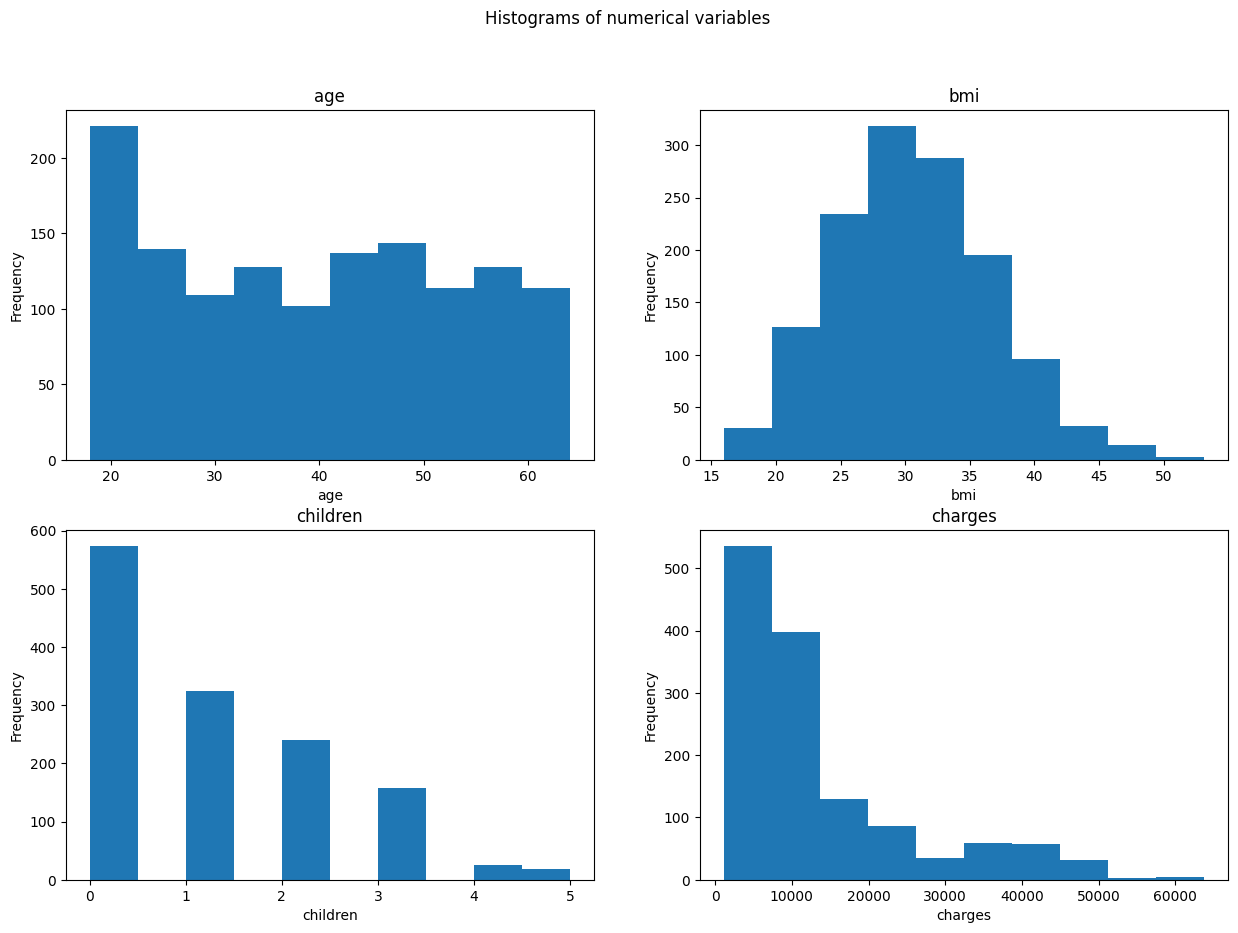

In [85]:
# Create a figure with subplots
figure, axes = plt.subplots(2, 2, figsize=(15, 10))
figure.suptitle('Histograms of numerical variables')
axes = axes.flatten()

# Create a histogram for each of the numerical variables
for n, field in enumerate(numerical_fields):
    axes[n].hist(main_df[field])
    axes[n].set_title(field)
    axes[n].set_xlabel(field)
    axes[n].set_ylabel('Frequency')
    
# Display the figure
plt.show()


### Bar Charts (Categorical Variables)

Visualizing the values of the categorical variables can help to understand the data. This can be accomplished by creating a bar chart for each of the categorical variables.

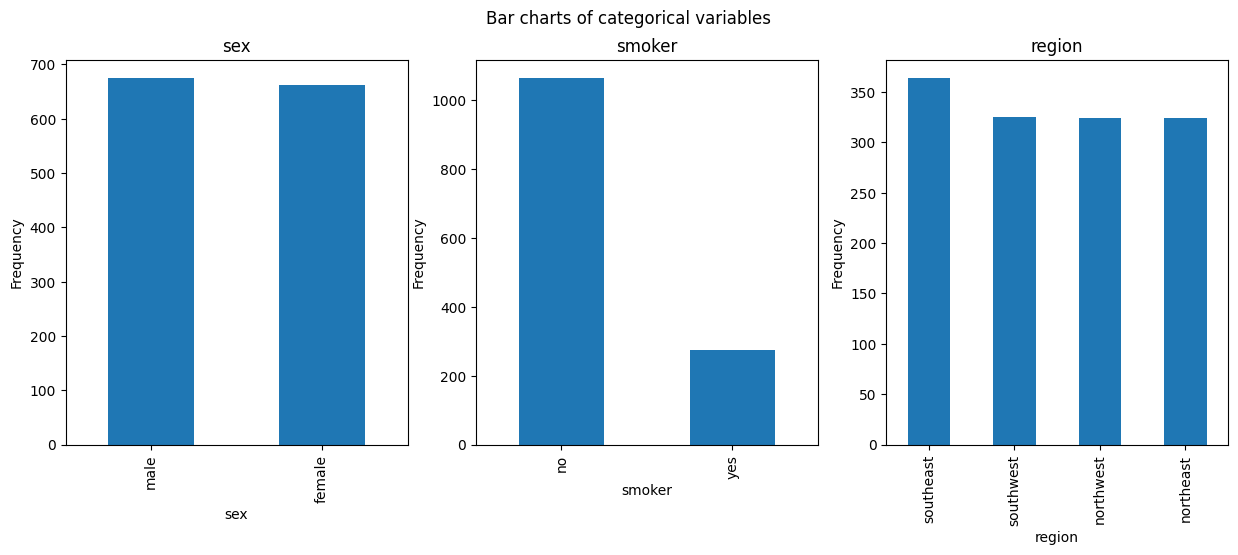

In [86]:
# Create a figure with subplots
figure, axes = plt.subplots(1, 3, figsize=(15, 5))
figure.suptitle('Bar charts of categorical variables')
axes = axes.flatten()

# Create a bar chart for each of the categorical variables
for n, field in enumerate(categorical_fields):
    main_df[field].value_counts().plot(kind='bar', ax=axes[n])
    axes[n].set_title(field)
    axes[n].set_xlabel(field)
    axes[n].set_ylabel('Frequency')
    
# Display the figure
plt.show()


### Interpretation of Univariate Analysis (Numerical Variables)


#### Age

The `age` of the patients is fairly evenly distributed, with a slight skew towards the younger ages in the 20s group. The mean age is 39 years old, with a standard deviation of 14 years. The youngest patient is 18 years old, and the oldest patient is 64 years old. The high standard deviation indicates that the data is spread out over a wide range of values, which can indicate that the age of the patients is not a good indicator of the insurance costs.


#### BMI

The histogram for `bmi` shows that the distribution is normal with a bell curve skewed to the right. The mean 30.66, with a standard deviation of 6.1, indicates a moderate variability. The range goes from 16 to 52. A BMI of 30 and above is normally falls under the category of obesity. Since the `bmi` values tend to be around the mean, this could potentially mean that it has an impact on insurance costs. The histogram also shows that there could be presence of outliers, creating a box plot will help to visualize this.

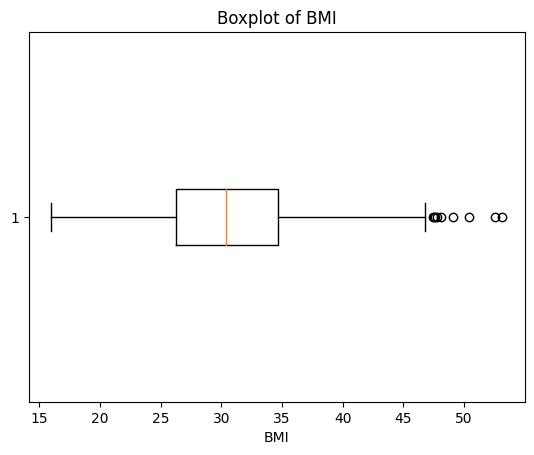

In [87]:
# Create a boxplot for the BMI variable
plt.boxplot(main_df['bmi'], vert=False)
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

Although the boxplot shows that there are outliers, the number looks to be small, but determining the amount may help to clarify this. First, the interquartile range will be calculated and using the upper and lower bounds, the outliers will be removed into a new dataframe.

In [88]:
# Calculate the interquartile range
bmi_iqr = main_df['bmi'].quantile(0.75) - main_df['bmi'].quantile(0.25)

# Calculate the upper and lower bounds
bmi_upper_bound = main_df['bmi'].quantile(0.75) + 1.5 * bmi_iqr
bmi_lower_bound = main_df['bmi'].quantile(0.25) - 1.5 * bmi_iqr

# Create a dataframe without the outliers
main_df_no_outliers = main_df[(main_df['bmi'] < bmi_upper_bound) & (main_df['bmi'] > bmi_lower_bound)]

# Calculate removed rows
percentage_removed = round((1 - main_df_no_outliers.shape[0] / main_df.shape[0]) * 100, 2)
quantity_removed = main_df.shape[0] - main_df_no_outliers.shape[0]

# Display the results
print(f'Number of rows in the original dataframe: {main_df.shape[0]}')
print(f'Number of rows in the new dataframe: {main_df_no_outliers.shape[0]}')
print(f'Percentage of rows removed: {percentage_removed}% ({quantity_removed} rows).')

Number of rows in the original dataframe: 1337
Number of rows in the new dataframe: 1328
Percentage of rows removed: 0.67% (9 rows).


The new dataframe has 1329 rows, which means that nine rows were removed. This number of rows represents 0.67% of the original dataset. This is a very small amount of data. For this reason, the outliers will be kept in the dataset, although further analysis could prove useful, but this is outside the scope of this project.


#### Children

There are larger numbers of patients without children. The histogram is skewed to the right, with a mean of 1.09 and a standard deviation of 1.21, meaning a high variation for the min and max values of 0 and 5 respectively. This variable could potentially have an impact on the insurance costs, although the standard deviation indicates that it may not be a good indicator.



#### Charges

The charges histogram is skewed to the right, with a mean of 13270.42 and a standard deviation of 12110.01. The range goes from 1121 to 63770. This indicates a high variability in the data, which could mean that this variable is a good indicator of the insurance costs. It's worth noting that the minimum value is very low compared to the maximum value, which could indicate that there are outliers in the data. To visualize this, a boxplot will be created in the next section.

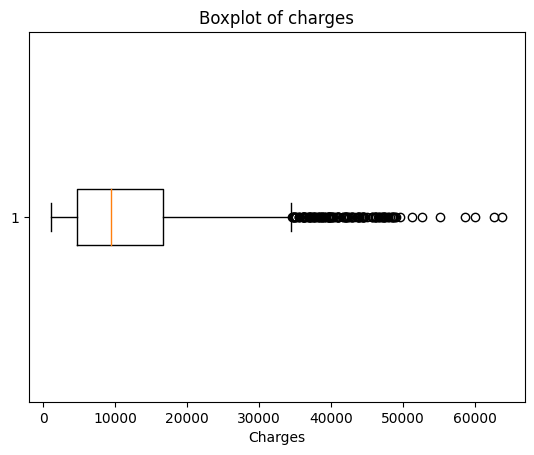

In [89]:
# Create a boxplot for the charges variable
plt.boxplot(main_df['charges'], vert=False)
plt.title('Boxplot of charges')
plt.xlabel('Charges')
plt.show()

The box plot shows that there outliers in the data. Determining how many outliers there are could help to better understand the data. First, the interquartile range will be calculated and using the upper and lower bounds, the outliers will be removed into a new dataframe.

In [90]:
# Calculate the interquartile range
charges_iqr = main_df['charges'].quantile(0.75) - main_df['charges'].quantile(0.25)

# Calculate the upper and lower bounds
charges_upper_bound = main_df['charges'].quantile(0.75) + 1.5 * charges_iqr
charges_lower_bound = main_df['charges'].quantile(0.25) - 1.5 * charges_iqr

# Create a dataframe without the outliers
main_df_no_outliers = main_df[(main_df['charges'] < charges_upper_bound) & (main_df['charges'] > charges_lower_bound)]

# Calculate removed rows
percentage_removed = round((1 - main_df_no_outliers.shape[0] / main_df.shape[0]) * 100, 2)
quantity_removed = main_df.shape[0] - main_df_no_outliers.shape[0]

# Display the results
print(f'Number of rows in the original dataframe: {main_df.shape[0]}')
print(f'Number of rows in the new dataframe: {main_df_no_outliers.shape[0]}')
print(f'Percentage of rows removed: {percentage_removed}% ({quantity_removed} rows).')

Number of rows in the original dataframe: 1337
Number of rows in the new dataframe: 1198
Percentage of rows removed: 10.4% (139 rows).


The new dataframe has 1198 rows, which means that 139 rows were removed. This number of rows represents 10.4 of the original dataset. This is a significant amount of data. Further analysis of the outliers could help determine if they should be removed or not (or if a portion of them should be removed), although this is, yet again, outside the scope of this project. For this reason, the outliers will be kept in the dataset.


### Interpretation of Univariate Analysis (Categorical Variables)


#### Sex

The values of the `sex` variable show that each value appears roughly fifty percent of the time. This means that the data is evenly distributed between the these two values. The frequency of each value is 676 for `male` and 662 for `female`. The mode is `male`, which means that the most common value is `male`, although the difference is very small with a difference of 14 values (0.98%), meaning that the `sex` could have little to no weight in the insurance costs.


#### Smoker

The `smoker` variable presents a bigger difference between the values with 1063 (79.51%) for `no` and 274 (20.49%) for `yes`. The mode is `no`, which means that the most common value is `no`. This difference may mean that the `smoker`variable could have a big impact on the insurance costs.


#### Region

The distribution of the values for the `region` variable is fairly even, except for the `southeast` region, which has 364 (27.23%) values, which makes it the most common value. This mode and related to otherwise even distribution of the other values means that the `region` variable could have a small but not insignificant impact on the insurance costs. 


## Bivariate Analysis

This section will cover a bivariate analysis, focusing primarily on the "`charges` versus all" relationships. To determine which of the variables affect the `charges` variable, the following relationships will be analyzed:

| Variable   | Relationship                |
|------------|-----------------------------|
| `age`      | `charges` versus `age`      |
| `bmi`      | `charges` versus `bmi`      |
| `children` | `charges` versus `children` |
| `sex`      | `charges` versus `sex`      |
| `smoker`   | `charges` versus `smoker`   |
| `region`   | `charges` versus `region`   |

The relationships will be analyzed using plots, and the strength of the relationship will be determined using the Pearson correlation analysis for the numerical variables and the chi-square test for the categorical variables. The strength of the relationship will be determined using the following table:

| Correlation | Strength of relationship |
|-------------|--------------------------|
| 0.00 - 0.19 | Very weak                |
| 0.20 - 0.39 | Weak                     |
| 0.40 - 0.59 | Moderate                 |
| 0.60 - 0.79 | Strong                   |
| 0.80 - 1.00 | Very strong              |

The numerical variables will be analyzed using scatter plots, and the categorical variables will be analyzed using box plots.
Unlike the previous section, the analysis of each variable will be done individually instead of creating the plots and then analyzing them.
Additionally, the information obtained in the previous section ([Univariate Analysis](#univariate-analysis)) will be taken into account when analyzing the relationships.


### Charges versus Age

#### Scatter plot

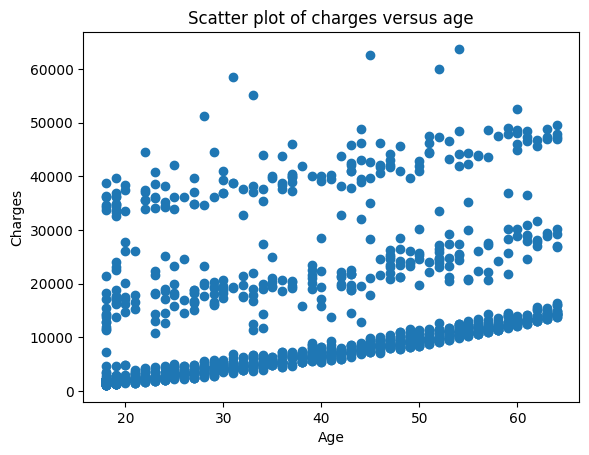

In [91]:
# Create a scatter plot for charges versus age
plt.scatter(main_df['age'], main_df['charges'])
plt.title('Scatter plot of charges versus age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### Correlation analysis

In [92]:
# Determine the correlation between the charges and age variables
correlation = main_df['charges'].corr(main_df['age'])
print(f'Correlation between charges and age: {round(correlation, 2)}')

Correlation between charges and age: 0.3


#### Interpretation

The scatter plot of `charges` versus `age` shows that a small relationship between the two variables could exist. The presence of outliers is also visible towards the higher values of the `charges` variable, from 50000 and above. The charges are divided between three groups or clusters in all age groups. These groups are as follows:

Note: These are aproximate values, as the clusters are not clearly defined.
- Group 1: From 1000 to 15000.
- Group 2: From 11000 to 29000.
- Group 3: From 32000 to 50000.

These curves lead to the conclusion that the `age` variable could have an impact on the `charges` variable, but another variable could be affecting the `charges` variable, which should explain the cause of the groups.

The high standard deviation found in the univariate analysis for the `age` variable can be appreciated in this scatter plot, since the data points are spread out over all the ages.

Finally, a 0.3 correlation between the `charges` and `age` variables indicates a weak relationship between the two variables.


### Charges versus BMI

#### Scatter plot

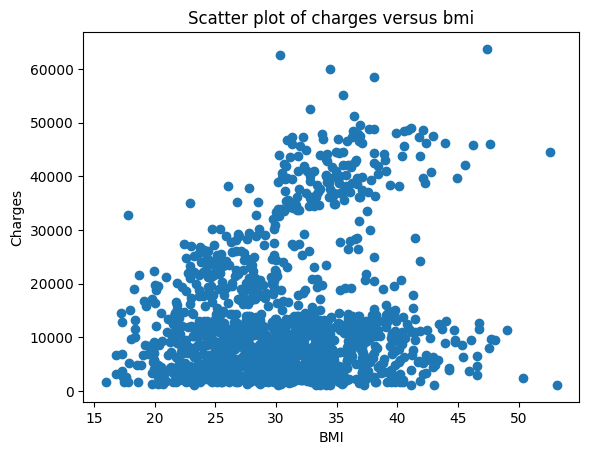

In [93]:
# Create a scatter plot for charges versus bmi
plt.scatter(main_df['bmi'], main_df['charges'])
plt.title('Scatter plot of charges versus bmi')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

#### Correlation analysis

In [94]:
# Determine the correlation between the charges and bmi variables
correlation = main_df['charges'].corr(main_df['bmi'])
print(f'Correlation between charges and bmi: {round(correlation, 2)}')

Correlation between charges and bmi: 0.2


#### Interpretation

The scatter plot of `charges` versus `bmi` shows that a relationship between the two variables could exist. There are two principal clusters of data points, one with a lower `bmi` and `charges` value and another with a higher `bmi` and `charges` value. Most of the data points seem to be centered around the 25-30 `bmi` range, with values between 1000 and 15000. Yet again, the high standard deviation found in the univariate analysis for the `bmi` variable can be appreciated in this scatter plot, since the data points are spread out over all the `bmi` values.

A correlation of 0.2 makes it a weak relationship.


### Charges versus Children

#### Scatter plot

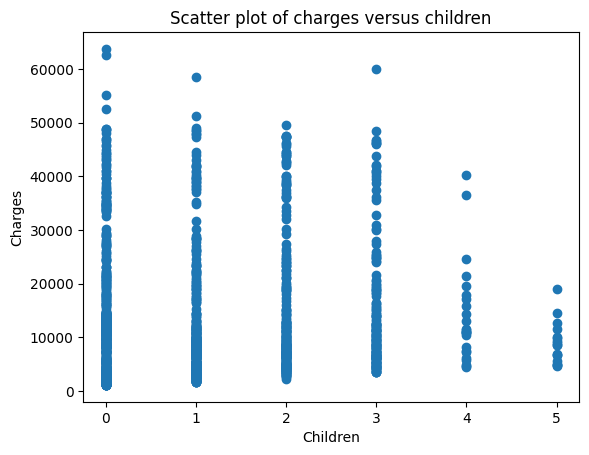

In [95]:
# Create a scatter plot for charges versus children
plt.scatter(main_df['children'], main_df['charges'])
plt.title('Scatter plot of charges versus children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

#### Correlation analysis

In [96]:
# Determine the correlation between the charges and children variables
correlation = main_df['charges'].corr(main_df['children'])
print(f'Correlation between charges and children: {round(correlation, 2)}')

Correlation between charges and children: 0.07


#### Interpretation

This plot shows that the `children` variable could be related to the `charges` variable, since the value of the `charges` decreases as the number of kids increases, except for two outliers in the four children group. The `charges` seem to be evenly even distributed from the zero to three children groups. It's also worth noting that the concentration of data points also decreases as the number of children increases. The standard deviation for the `children`variable, which is 1.09, make it a good indicator that this could be one of the worst variables to predict the `charges` variable. This can be further confirmed by the correlation of 0.07, which indicates a very weak relationship.


### Charges versus Sex

#### Box plot

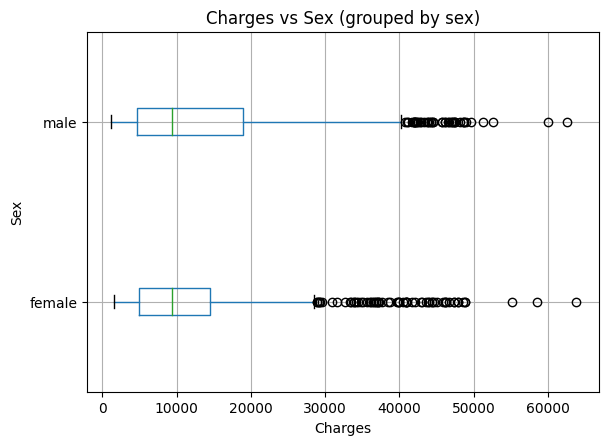

In [97]:
# Create a box plot for each unique value of 'sex' versus 'charges'
main_df.boxplot(column='charges', by='sex', vert=False)
plt.suptitle('') # Remove the default title
plt.title('Charges vs Sex (grouped by sex)')
plt.xlabel('Charges')
plt.ylabel('Sex')
plt.show()

#### Correlation analysis

In [98]:
# Determine the correlation between the charges and sex
correlation = main_df['charges'].corr(main_df['sex'].map({'male': 1, 'female': 0}), method='spearman')
print(f'Correlation between charges and smoker: {round(correlation, 2)}')

Correlation between charges and smoker: 0.01


#### Interpretation

The `charges` for the `male` and `female` values are fairly similar, with the `male` containing slightly higher values in the outliers. Additionally, the 75th percentile (Q3 or upper quartile) of the `male` values is higher than the `female` values by at least 5000. This indicates a posible relation between the variables, but it could be moderate. The correlation of 0.01 indicates a very weak relationship between the two variables.


### Charges versus Smoker

#### Box plot

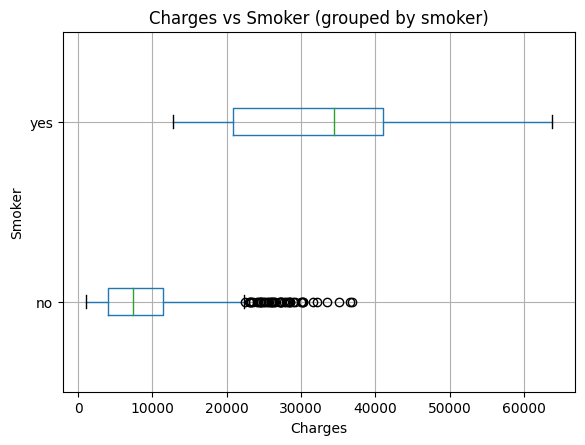

In [99]:
# Create a box plot for each unique value of 'smoker' versus 'charges'
main_df.boxplot(column='charges', by='smoker', vert=False)
plt.suptitle('') # Remove the default title
plt.title('Charges vs Smoker (grouped by smoker)')
plt.xlabel('Charges')
plt.ylabel('Smoker')
plt.show()

#### Correlation analysis

In [100]:
# Determine the correlation between the charges and smoker variables
correlation = main_df['charges'].corr(main_df['smoker'].map({'yes': 1, 'no': 0}), method='spearman')
print(f'Correlation between charges and smoker: {round(correlation, 2)}')

Correlation between charges and smoker: 0.66


#### Interpretation

The `smoker` variable has a difference between its value were the mean of the values realted to the `yes` value is much higher than the ones for the `no`. This could potentially portray a relationship between the `smoker` and `charges` variables. It's also worth noting that the `no` value has outliers, while the `yes` value doesn't. Reviewing these outliers could prove useful, but this is outside the scope of this project. The correlation of 0.79 indicates a strong relationship between the two variables.


### Charges versus Region

#### Box plot

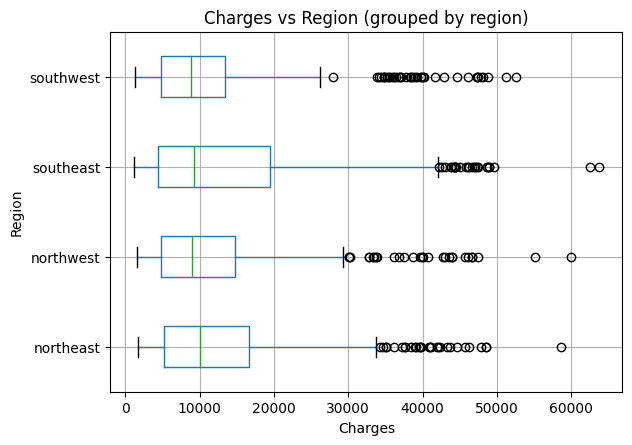

In [101]:
# Create a box plot for each unique value of 'region' versus 'charges'
main_df.boxplot(column='charges', by='region', vert=False)
plt.suptitle('') # Remove the default title
plt.title('Charges vs Region (grouped by region)')
plt.xlabel('Charges')
plt.ylabel('Region')
plt.show()

#### Correlation analysis

In [102]:
# Determine the correlation between the charges and region variables
correlation = main_df['charges'].corr(main_df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}), method='spearman')
print(f'Correlation between charges and region: {round(correlation, 2)}')

Correlation between charges and region: 0.04


#### Interpretation

The distribution for the `charges` of each unique value for the `region` variable appears to be even with a slightly higher rate for the `southeast` and `northeast` values. The outliers of each value are also fairly similar, except for `southwest` where there looks to be a higher concentration of them. Finally, the 75th percentile of the `southeast` seems to have a much higher value than the others, this could be due to the higher density of data points that are present in this category (see: [Bar Charts for categorical variables](#bar-charts)). The correlation of 0.06 indicates a very weak relationship between the two variables.


## Summary of the Exploratory Data Analysis findings

The following table summarizes the findings of the Exploratory Data Analysis:

| Variable   | Relationship                | Correlation | Strength of relationship |
|------------|-----------------------------|-------------|--------------------------|
| `age`      | `charges` versus `age`      | 0.29        | Weak                     |
| `bmi`      | `charges` versus `bmi`      | 0.2         | Weak                     |
| `children` | `charges` versus `children` | 0.07        | Very weak                |
| `sex`      | `charges` versus `sex`      | 0.01        | Very weak                |
| `smoker`   | `charges` versus `smoker`   | 0.79        | Strong                   |
| `region`   | `charges` versus `region`   | 0.06        | Very weak                |

The `smoker` variable has the strongest relationship with the `charges` variable, followed by the `age` and `bmi` variables. The `children`, `sex`, and `region` variables have a very weak relationship with the `charges` variable. This means that the `smoker` variable is the best indicator of the `charges` variable, followed by the `age` and `bmi` variables. The `children`, `sex`, and `region` variables are not good indicators of the `charges` variable.


# Conclusions

This project is a great opportunity to further explore my growing skills related to data analysis. I still have much to learn and hope to further improve this project by coming back to it periodically, applying new skills and techniques as I learn them. Furthermore, creating a project to work on a predictive model for the insurance costs could also be useful in the future to give a continuation to this project.

This project was originally provided by codecademy, and although it provided with a simple dataset with simple instructions, it has become a big project and one that has helped me learn a lot. I hope that this project can help others to learn as well.

Finally, I would like to thank you for taking the time to read this project and hope that you have found it useful.